In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

First, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

This creates a geopandas DataFrame, which is like a pandas DataFrame, but has geometry associated with it.

In [2]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [3]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


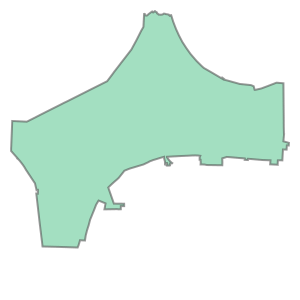

In [4]:
counties.loc[0, 'geometry']

In [5]:
print(counties.loc[0,'geometry'])

POLYGON ((1137985.762302732 344601.6428789578, 1137965.070414974 344714.3860917902, 1137929.600669654 344906.2039496347, 1137898.154866396 345512.6623823774, 1137469.445750057 348995.837174541, 1137435.707956642 349269.1735701271, 1137091.994077147 352061.7139167924, 1136748.37140481 354854.6213887136, 1136636.600959063 355763.4220645485, 1136565.782203062 356369.5481488769, 1136058.004675312 360699.4479536295, 1136009.277738645 361126.5176375521, 1135624.252590057 364489.0496263644, 1135517.175048305 365423.2124561986, 1135414.877024567 366315.3635590593, 1135106.624360228 369005.3322604543, 1134744.459074066 372166.5884051323, 1134707.664200141 372487.3554801308, 1135459.29261814 372472.4450768733, 1135495.093399571 372461.5914240404, 1135498.208878892 372497.5523101155, 1135527.608754484 372868.8652157952, 1135523.078579808 373138.8226811268, 1135535.057230393 373537.5791014506, 1135542.899734396 373854.1578646234, 1135555.788160057 374305.6887857206, 1135540.49586782 374439.0366161

If we call `.plot()` and a GeoDataFrame, it will render a plot using the geometry column.

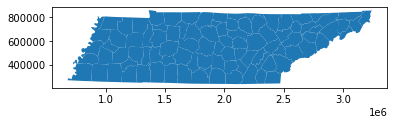

In [6]:
counties.plot();

If we want a larger plot, we can use `plt.subplots()` and set a figsize. When we create our plot, we need to specify that we want it to render on the axes we just created.

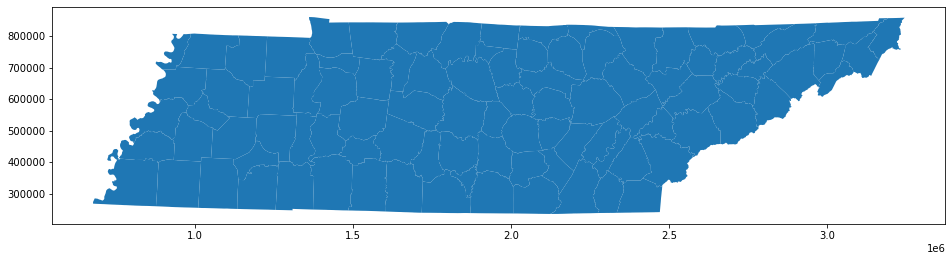

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

Since the axes are not conveying useful information, we can remove them.

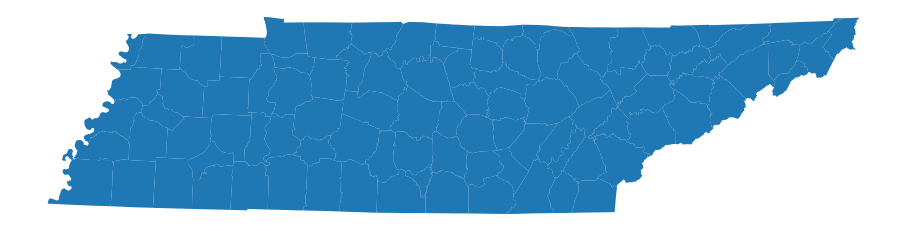

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [10]:
unemployment = pd.read_csv('../data/unemployment.csv')

unemployment.head()

,COUNTY,STATE,periodName,year,unemployment_rate
0,Anderson,TN,December,2018,3.2
1,Bedford,TN,December,2018,3.2
2,Benton,TN,December,2018,3.8
3,Bledsoe,TN,December,2018,5.4
4,Blount,TN,December,2018,2.8


Now, we can merge the two together. If we put the GeoDataFrame on the left, the result will be a GeoDataFrame.

In [13]:
counties = pd.merge(left = counties, right = unemployment, left_on = 'NAME', right_on = 'COUNTY')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,COUNTY,STATE,periodName,year,unemployment_rate
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester,TN,December,2018,3.0
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne,TN,December,2018,2.9
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton,TN,December,2018,4.4
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton,TN,December,2018,2.7
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart,TN,December,2018,2.9


To color our map based on a column, we can use the `column` argument.

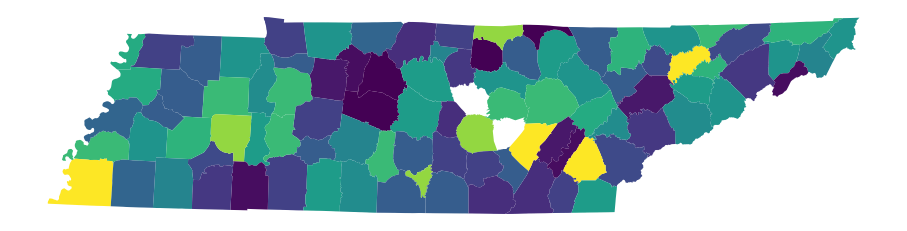

In [14]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              ax = ax)
ax.axis('off');

The default colormap is not great. We can change it by specifying the `cmap` argument. A list of named colormaps is available at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.

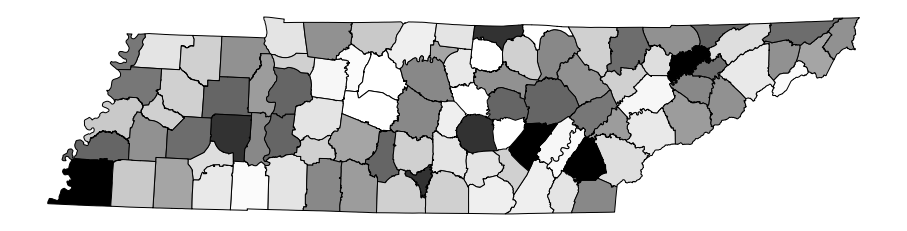

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Unemployment Rate by County, December 2018', fontsize = 14)
ax.axis('off');